In [1]:
import pandas as pd 
import numpy as np 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
con=sqlite3.connect(r'C:\Users\piyush\Desktop\Raw_files\Zoamto_File(geospacial)\Resources/Zomato_rawdata.sqlite')

In [3]:
df=pd.read_sql_query('SELECT * FROM Users',con)

In [4]:
df.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.shape

(51717, 18)

In [6]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
df.isnull().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [8]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
df['rate'].replace(('NEW','-'),np.nan , inplace=True)

In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
df['rate']=df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x)== str else x  )

## Is there a relation between online order and rating of the restraunt?

In [12]:
X=pd.crosstab(df['rate'],df['online_order']) ## a pivot table for a relation between rating and online order available or not

In [13]:
X

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<AxesSubplot:xlabel='rate'>

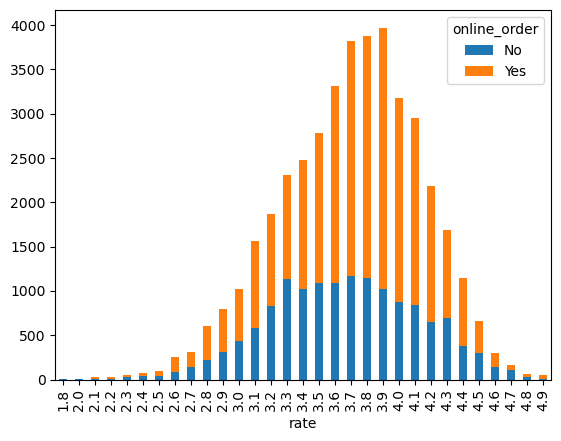

In [14]:
X.plot(kind='bar',stacked=True)

In [15]:
X.sum(axis=1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [16]:
normalize_df=X.div(X.sum(axis=1).astype(float),axis=0)

<AxesSubplot:xlabel='rate'>

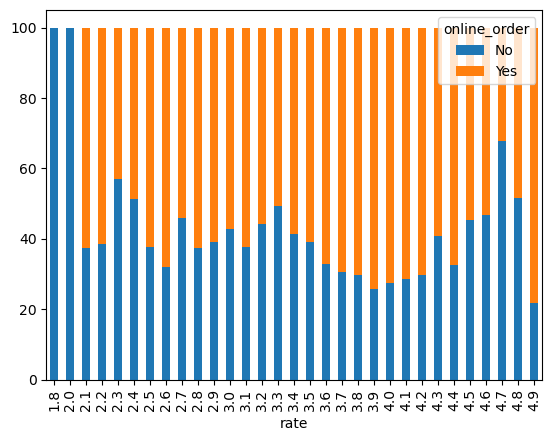

In [17]:
(normalize_df*100).plot(kind='bar',stacked=True)

## Data Cleaning to perform Text Analysis

In [18]:
df['rest_type'].isnull().sum()

227

In [19]:
data =df.dropna(subset=['rest_type'])

In [20]:
data['rest_type'].isnull().sum()

0

In [21]:
quick_bites_df=data[data['rest_type'].str.contains('Quick Bites')]

In [22]:
quick_bites_df.shape

(20639, 18)

In [23]:
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [24]:
quick_bites_df['reviews_list']=quick_bites_df['reviews_list'].apply(lambda x: x.lower())

C:\Users\piyush\AppData\Local\Temp\ipykernel_27636\2481729034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_df['reviews_list']=quick_bites_df['reviews_list'].apply(lambda x: x.lower())


In [25]:
from nltk.corpus import RegexpTokenizer

In [26]:
tokenizer=RegexpTokenizer("[a-zA-Z]+")

In [27]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [28]:
quick_bites_df['reviews_list'][3]

'[(\'rated 4.0\', "rated\\n  great food and proper karnataka style full meals. been there twice and was fully satisfied.. will give 5 stars if it\'s well managed............"), (\'rated 2.0\', \'rated\\n  reached the place at 3pm on saturday. half of the items on the menu were over. what was annoying was is the food was cold. the taste was also very average. only dosa and holige were good. there were very few people in the restaurant and the service was still very slow. the waiters were all standing in one corner and talking. had to call them repeatedly.\'), (\'rated 4.0\', \'rated\\n  had been here, good food served and tasty,good place to go with freinds and family, should be first to get served well with all food. one of the good hotel there for this price.\'), (\'rated 2.0\', \'rated\\n  how can a udupi restaurant be so dirty.the floor the walls the waiters are all stained in food.why cant they clean it? the floor even had decorative colour paper every where and lot of food.now com

In [29]:
tokenizer.tokenize(quick_bites_df['reviews_list'][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [30]:
sample=data[0:10000]

In [31]:
reviews_token=sample['reviews_list'].apply(tokenizer.tokenize)

In [32]:
reviews_token

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

## Performing Unigram analysis & removal of stopwords...

In [33]:
import nltk

In [34]:
##nltk.download()

In [35]:
from nltk.corpus import stopwords

In [36]:
stop =stopwords.words('english')

In [37]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [38]:
stop.extend(['rated','n','nan','x','Rated','RATED'])

In [39]:
review_token_clean=reviews_token.apply(lambda each_review :[token for token in each_review if token not in stop])

In [40]:
 total_reviews_2d=list(review_token_clean)

In [41]:
total_reviews_1d=[]

for review in total_reviews_2d:
    for word in review:
        total_reviews_1d.append(word)

In [42]:
total_reviews_1d

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

In [43]:
from nltk import FreqDist

In [44]:
fd=FreqDist()

In [45]:
for word in total_reviews_1d:
    fd[word]=fd[word]+1

In [46]:
fd.most_common(20)

[('place', 139173),
 ('I', 137965),
 ('good', 134232),
 ('food', 126195),
 ('The', 97479),
 ('chicken', 46887),
 ('service', 41216),
 ('taste', 40063),
 ('ordered', 39651),
 ('great', 34402),
 ('really', 33942),
 ('time', 33052),
 ('try', 32415),
 ('one', 32079),
 ('ambience', 31703),
 ('like', 30679),
 ('also', 30647),
 ('It', 30487),
 ('visit', 27355),
 ('restaurant', 26421)]

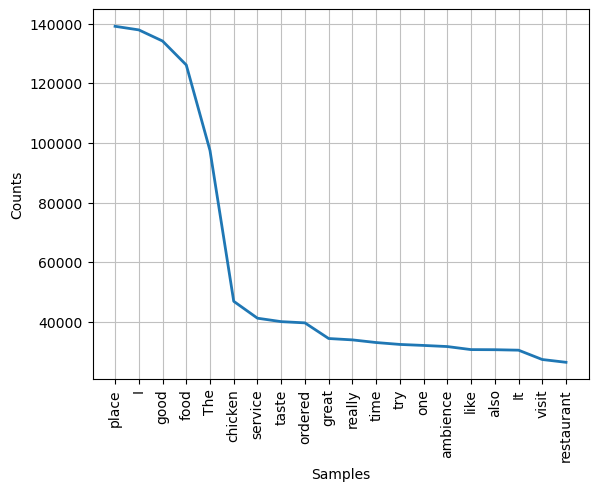

In [47]:
fd.plot(20);

## Performing Bi-gram & Trigram Analysis

In [48]:
from nltk import FreqDist, bigrams, trigrams

In [49]:
bigrams=bigrams(total_reviews_1d)

In [50]:
bigrams

<generator object bigrams at 0x000001D87C1ADBA0>

In [51]:
fd_bigrams=FreqDist()
for bigram in bigrams:
    fd_bigrams[bigram]=fd_bigrams[bigram]+1

In [52]:
fd_bigrams.most_common(20)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10159),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7223),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6823),
 (('good', 'food'), 6482),
 (('The', 'place'), 6158),
 (('main', 'course'), 5544),
 (('non', 'veg'), 5364),
 (('good', 'place'), 5339),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5083),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4523),
 (('good', 'I'), 4139),
 (('good', 'The'), 4078)]

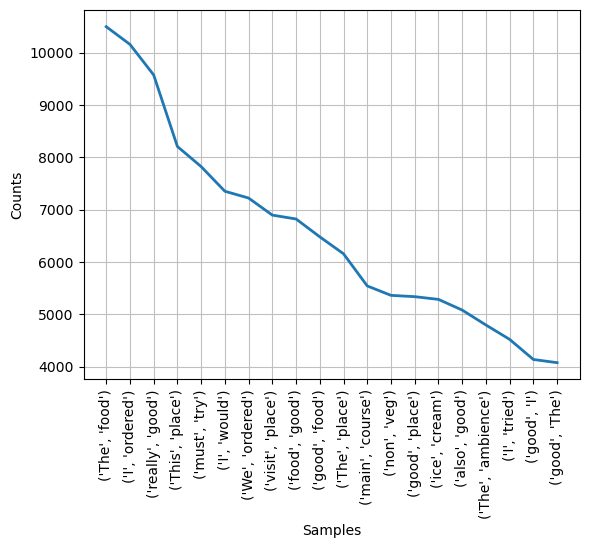

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [53]:
fd_bigrams.plot(20)

In [54]:
tri_grams=trigrams(total_reviews_1d)

In [55]:
fd_trigrams=FreqDist()
for trigram in tri_grams:
    fd_trigrams[trigram]=fd_trigrams[trigram]+1

In [56]:
fd_trigrams.most_common(20)

[(('veg', 'non', 'veg'), 1525),
 (('must', 'visit', 'place'), 1487),
 (('The', 'food', 'good'), 1339),
 (('place', 'hangout', 'friends'), 1165),
 (('I', 'must', 'say'), 1131),
 (('I', 'would', 'recommend'), 1059),
 (('I', 'visited', 'place'), 1054),
 (('I', 'would', 'say'), 979),
 (('place', 'hang', 'friends'), 967),
 (('food', 'really', 'good'), 886),
 (('nFood', 'nAmbience', 'nService'), 845),
 (('A', 'must', 'visit'), 768),
 (('The', 'ambience', 'good'), 751),
 (('A', 'good', 'place'), 737),
 (('North', 'Indian', 'food'), 675),
 (('I', 'would', 'like'), 619),
 (('nFood', 'nService', 'nAmbience'), 607),
 (('A', 'must', 'try'), 603),
 (('I', 'really', 'liked'), 595),
 (('I', 'ordered', 'chicken'), 582)]

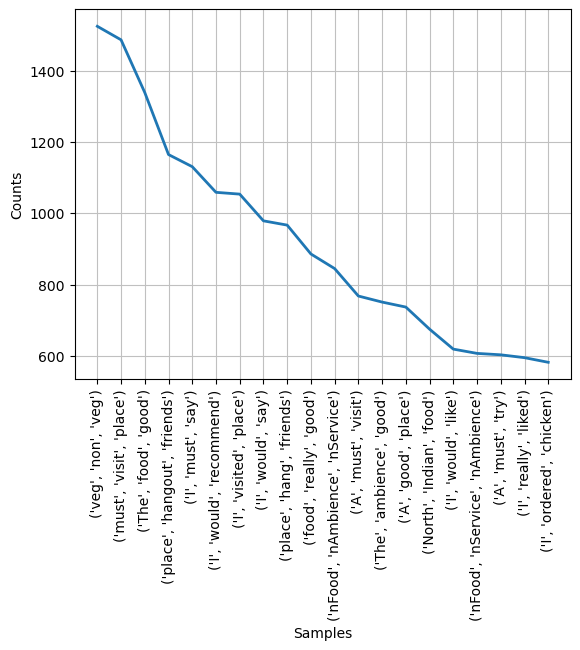

In [57]:
fd_trigrams.plot(20);

## Extract geographical-coordinates from data

In [58]:
!pip install geocoder
!pip install geopy

In [59]:
len(df['location'].unique())

94

In [72]:
df['location']= df['location']+", Bangalore , Karnataka, India"

In [73]:
df_copy = df.copy()

In [74]:
df_copy['location'].isnull().sum()

21

In [75]:
df_copy=df_copy.dropna(subset=['location'])

In [76]:
locations=pd.DataFrame(df_copy['location'].unique())

In [77]:
locations.columns=['Name']

In [78]:
locations

,Name
0,"Banashankari, Bangalore , Karnataka, India"
1,"Basavanagudi, Bangalore , Karnataka, India"
2,"Mysore Road, Bangalore , Karnataka, India"
3,"Jayanagar, Bangalore , Karnataka, India"
4,"Kumaraswamy Layout, Bangalore , Karnataka, India"
...,...
88,"West Bangalore, Bangalore , Karnataka, India"
89,"Magadi Road, Bangalore , Karnataka, India"
90,"Yelahanka, Bangalore , Karnataka, India"
91,"Sahakara Nagar, Bangalore , Karnataka, India"


In [79]:
from geopy.geocoders import Nominatim

In [80]:
geolocator=Nominatim(user_agent='app',timeout=None)

In [81]:
lat=[]
lon=[]


for location in locations['Name']:
    location=geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)


In [82]:
locations['latitude']=lat
locations['longitude']=lon

In [83]:
locations

,Name,latitude,longitude
0,"Banashankari, Bangalore , Karnataka, India",12.915221,77.573598
1,"Basavanagudi, Bangalore , Karnataka, India",12.941726,77.575502
2,"Mysore Road, Bangalore , Karnataka, India",12.946662,77.530090
3,"Jayanagar, Bangalore , Karnataka, India",12.929273,77.582423
4,"Kumaraswamy Layout, Bangalore , Karnataka, India",12.908149,77.555318
...,...,...,...
88,"West Bangalore, Bangalore , Karnataka, India",13.022235,77.567183
89,"Magadi Road, Bangalore , Karnataka, India",12.975608,77.555356
90,"Yelahanka, Bangalore , Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar, Bangalore , Karnataka, India",13.062147,77.580061


In [84]:
locations.isnull().sum()

Name         0
latitude     3
longitude    3
dtype: int64

In [85]:
locations[locations['latitude'].isnull()]

,Name,latitude,longitude
45,"St. Marks Road, Bangalore , Karnataka, India",NaN,NaN
79,"Rammurthy Nagar, Bangalore , Karnataka, India",NaN,NaN
85,"Sadashiv Nagar, Bangalore , Karnataka, India",NaN,NaN


In [87]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [88]:
locations['latitude'][45]=12.9764122
locations['longitude'][45]=77.6017437
locations['latitude'][79]=13.0184435
locations['longitude'][79]=77.6781214
locations['latitude'][85]= 13.0068
locations['longitude'][85]=77.5813


In [89]:
locations.isnull().sum()

Name         0
latitude     0
longitude    0
dtype: int64

## Build a geographical Heat-Maps

In [94]:
df['cuisines'].isnull().sum()

45

In [95]:
df=df.dropna(subset=['cuisines'])

In [97]:
North_Ind=df[df['cuisines'].str.contains('North Indian')]

In [99]:
North_Ind.shape

(21085, 18)

In [100]:
North_Ind.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari, Bangalore , Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari, Bangalore , Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,"Banashankari, Bangalore , Karnataka, India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,"Basavanagudi, Bangalore , Karnataka, India",Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,"Basavanagudi, Bangalore , Karnataka, India",Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari


In [103]:
North_Ind['location'].value_counts()

BTM, Bangalore , Karnataka, India                  2469
HSR, Bangalore , Karnataka, India                  1123
Whitefield, Bangalore , Karnataka, India           1059
Marathahalli, Bangalore , Karnataka, India         1038
JP Nagar, Bangalore , Karnataka, India              958
                                                   ... 
Hebbal, Bangalore , Karnataka, India                  4
Jakkur, Bangalore , Karnataka, India                  3
Central Bangalore, Bangalore , Karnataka, India       2
West Bangalore, Bangalore , Karnataka, India          1
Peenya, Bangalore , Karnataka, India                  1
Name: location, Length: 90, dtype: int64

In [108]:
north_ind_count=North_Ind['location'].value_counts().reset_index().rename(columns={'index':'Name','location':'count'})

In [109]:
north_ind_count

,Name,count
0,"BTM, Bangalore , Karnataka, India",2469
1,"HSR, Bangalore , Karnataka, India",1123
2,"Whitefield, Bangalore , Karnataka, India",1059
3,"Marathahalli, Bangalore , Karnataka, India",1038
4,"JP Nagar, Bangalore , Karnataka, India",958
...,...,...
85,"Hebbal, Bangalore , Karnataka, India",4
86,"Jakkur, Bangalore , Karnataka, India",3
87,"Central Bangalore, Bangalore , Karnataka, India",2
88,"West Bangalore, Bangalore , Karnataka, India",1


In [110]:
heat_map_df=north_ind_count.merge(locations , on='Name', how='left')

In [111]:
heat_map_df

,Name,count,latitude,longitude
0,"BTM, Bangalore , Karnataka, India",2469,12.911276,77.604565
1,"HSR, Bangalore , Karnataka, India",1123,12.911623,77.638862
2,"Whitefield, Bangalore , Karnataka, India",1059,12.969637,77.749745
3,"Marathahalli, Bangalore , Karnataka, India",1038,12.955257,77.698416
4,"JP Nagar, Bangalore , Karnataka, India",958,12.912076,77.579393
...,...,...,...,...
85,"Hebbal, Bangalore , Karnataka, India",4,13.038218,77.591900
86,"Jakkur, Bangalore , Karnataka, India",3,13.078474,77.606894
87,"Central Bangalore, Bangalore , Karnataka, India",2,13.010129,77.554801
88,"West Bangalore, Bangalore , Karnataka, India",1,13.022235,77.567183


In [113]:
!pip install folium

     ------------------------------------ 102.3/102.3 kB 309.9 kB/s eta 0:00:00


In [114]:
import folium

In [118]:
basemap=folium.Map()

In [119]:
basemap

In [121]:
from folium.plugins import HeatMap

In [123]:
heat_map_df.columns

Index(['Name', 'count', 'latitude', 'longitude'], dtype='object')

In [124]:
HeatMap(heat_map_df[['latitude', 'longitude','count']]).add_to(basemap)

In [125]:
basemap

## Automate Your task


In [131]:
def get_heatmap(cuisine):
    
    cuisine_df=df[df['cuisines'].str.contains(cuisine)]
    
    cuisine_count=cuisine_df['location'].value_counts().reset_index().rename(columns={'index':'Name','location':'count'})
    heat_map_df=cuisine_count.merge(locations , on='Name', how='left')
    print(heat_map_df.head(4))
    
    basemap=folium.Map()
    HeatMap(heat_map_df[['latitude', 'longitude','count']]).add_to(basemap)
    return basemap
    

In [132]:
get_heatmap('South Indian')

                                      Name  count   latitude  longitude
0        BTM, Bangalore , Karnataka, India    815  12.911276  77.604565
1   JP Nagar, Bangalore , Karnataka, India    437  12.912076  77.579393
2        HSR, Bangalore , Karnataka, India    436  12.911623  77.638862
3  Jayanagar, Bangalore , Karnataka, India    416  12.929273  77.582423
